# Observing How Biomechanical Features of Orthopedic Patients Predict Abnormal Attributes
By Evan Kranzler

I decided I would analyze some data prepared for machine learning students. The dataset I chose was [Biomechanical features of orthopedic patients](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients), available on Kaggle.

The dataset utilizes several biomechanical features to determine whether a patient has a hernia, spondylolisthesis, or neither. It is assumed that they do not have both.

We begin by analyzing the data. The first thing we look for is missing values, which in this case are not present. Without those, we go to look for outliers. For each data point, we can examine how many standard deviations the maximum value is from the mean:

In [77]:
deviations = []
for column in data.columns:
    if column != 'class':
        deviations += [(column, (data[column].max() - data[column].mean()) / data[column].std())]
pd.DataFrame(deviations, columns=['Column', 'Deviations from Mean'])

,Column,Deviations from Mean
0,pelvic_incidence,4.022702
1,pelvic_tilt,3.186250
2,lumbar_lordosis_angle,3.978183
3,sacral_slope,5.846319
4,pelvic_radius,3.390336
5,degree_spondylolisthesis,10.443465


We can see that `sacral_slope` and `degree_spondylolisthesis` both go much higher than the mean, and when we look for the rows that cause these outliers, we find the following:

In [78]:
data[data.degree_spondylolisthesis == data.degree_spondylolisthesis.max()]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis


If we drop this row, we see that both outliers are removed.

In [79]:
data.drop(115, axis=0, inplace=True)
deviations = []
for column in data.columns:
    if column != 'class':
        deviations += [(column, (data[column].max() - data[column].mean()) / data[column].std())]
pd.DataFrame(deviations, columns=['Column', 'Deviations from Mean'])

,Column,Deviations from Mean
0,pelvic_incidence,3.443795
1,pelvic_tilt,3.182450
2,lumbar_lordosis_angle,3.971358
3,sacral_slope,2.918312
4,pelvic_radius,3.385609
5,degree_spondylolisthesis,4.092266


With that done, we can begin to visualize the data. We'll observe correlations among each column first.

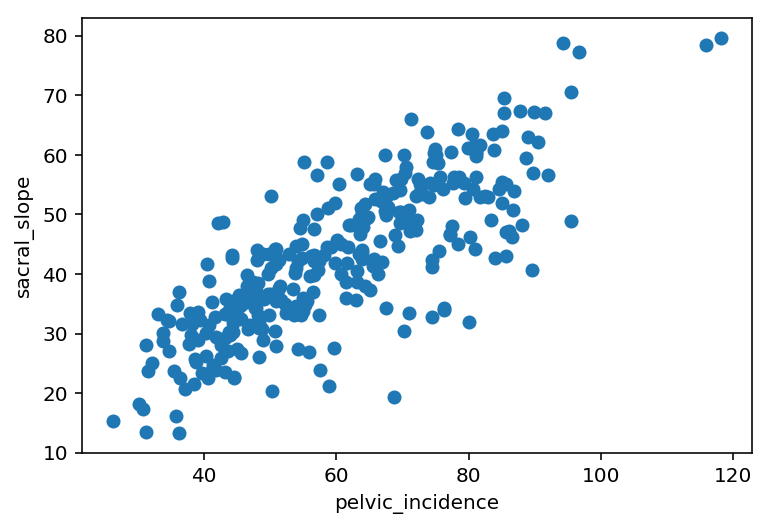

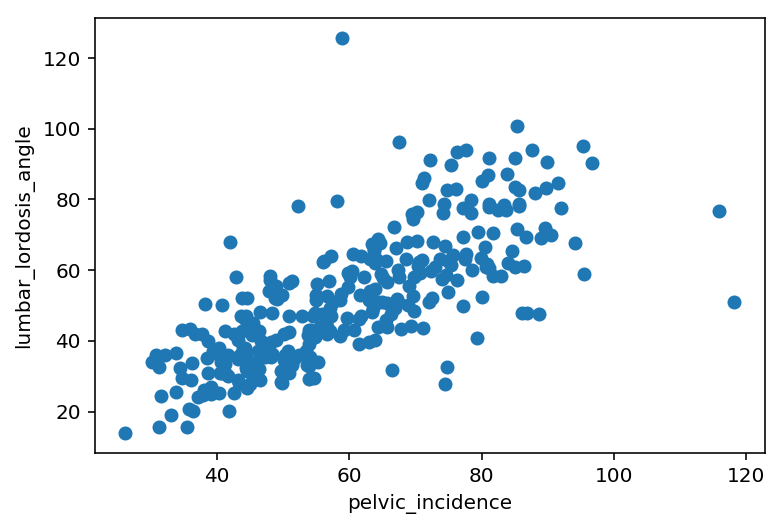

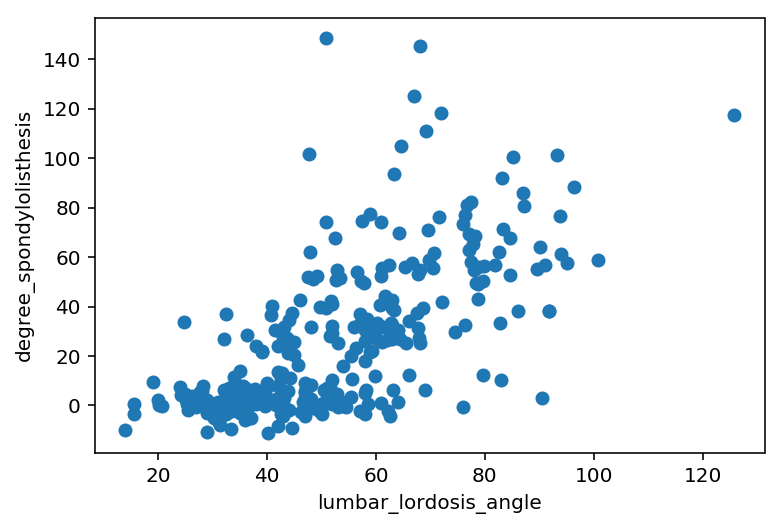

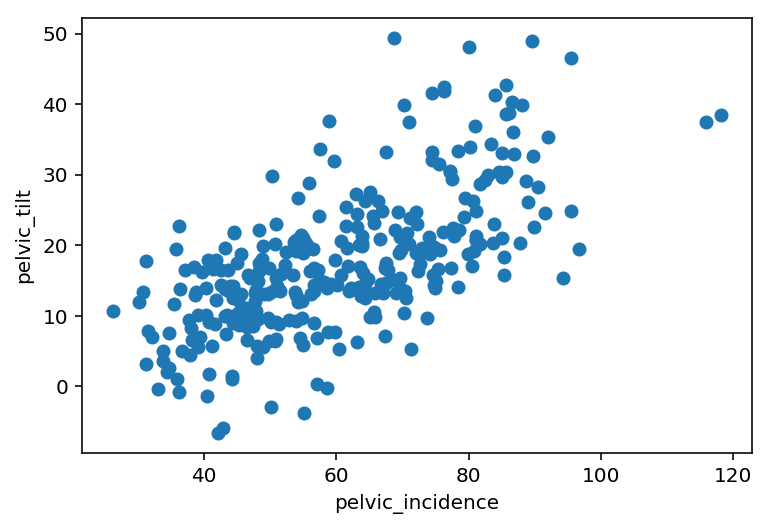

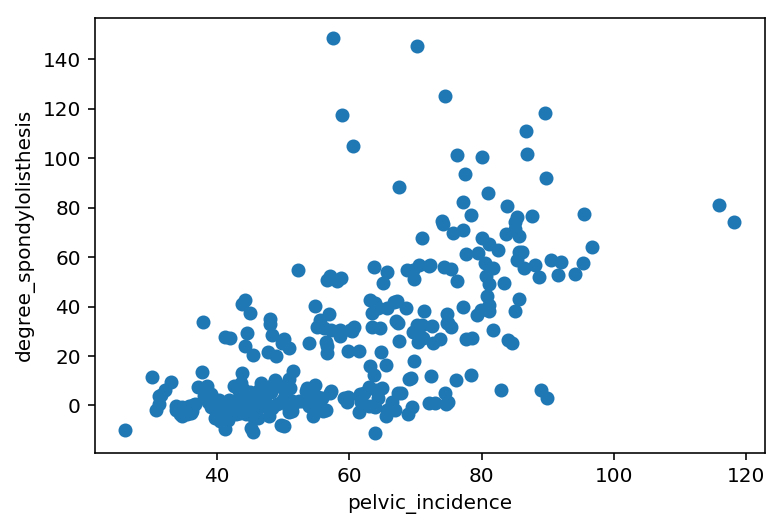

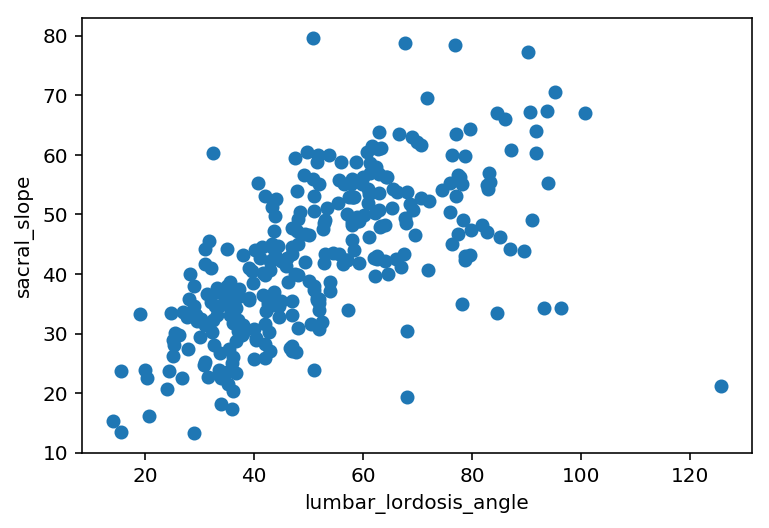

In [92]:
corrs = []
for column1, column2 in it.combinations(data.columns, 2):
    if column1 != 'class' and column2 != 'class':
        corrs += [(round(np.corrcoef(data[column1], data[column2])[0][1], 2), column1, column2)]
corrs = sorted(corrs)
for _, column1, column2 in corrs[-6:][::-1]:
    plt.scatter(data[column1], data[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

We can see that `pelvic_incidence` is highly correlated with `sacral_slope` and `lumbar_lordosis_angle`, although their correlations with each other are lesser. The correlations are nonetheless strong and could certainly be simplified with a Principle Component Analysis.